# Finding Heavy Traffic Indicators on I-94 - Exploratory Data Analysis
![traffic](i-94.jpg)

## Introduction:
We're going to analyze a dataset about the westbound traffic on the I-94 Interstate highway.

A station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west)



## Goal:

The goal of our Exploratory Data Analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

**Caveat:** Since the results of our analysis will be about the westbound traffic in the proximity of that station, we should avoid generalizing our results for the entire I-94


### Data Dictionary:
|Feature name |Type |Description | 
|:-----|:-----|:-----|
|holiday |Categorical |US National holidays plus regional holiday, Minnesota State Fair|
|temp |Numeric |Average temp in kelvin|
|rain_1h |Numeric |Amount in mm of rain that occurred in the hour|
|snow_1h |Numeric |Amount in mm of snow that occurred in the hour|
|clouds_all |Numeric |Percentage of cloud cover|
|weather_main |Categorical |Short textual description of the current weather|
|weather_description |Categorical |Longer textual description of the current weather|
|date_time |DateTime |Hour of the data collected in local CST time|
|traffic_volume |Numeric |Hourly I-94 ATR 301 reported westbound traffic volume|



### Resources:
The dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)

---


In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns 
%matplotlib inline 

In [2]:
# Loading Dataset
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

---

## Data Exploration

In [3]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
traffic.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [6]:
traffic.describe(include='all')

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
count,48204,48204.000000,48204.000000,48204.000000,48204.000000,48204,48204,48204,48204.000000
unique,12,NaN,NaN,NaN,NaN,11,38,40575,NaN
top,None,NaN,NaN,NaN,NaN,Clouds,sky is clear,2013-05-19 10:00:00,NaN
freq,48143,NaN,NaN,NaN,NaN,15164,11665,6,NaN
mean,NaN,281.205870,0.334264,0.000222,49.362231,NaN,NaN,NaN,3259.818355
std,NaN,13.338232,44.789133,0.008168,39.015750,NaN,NaN,NaN,1986.860670
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,272.160000,0.000000,0.000000,1.000000,NaN,NaN,NaN,1193.000000
50%,NaN,282.450000,0.000000,0.000000,64.000000,NaN,NaN,NaN,3380.000000
75%,NaN,291.806000,0.000000,0.000000,90.000000,NaN,NaN,NaN,4933.000000


In [7]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


- No null values found 
- `date_time` should be in DateTime Dtypes.

Convert `date_time` to datetime object

In [8]:
# transforming date_time to datetime 
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

### Lets look closer into `traffic_volume`

In [9]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

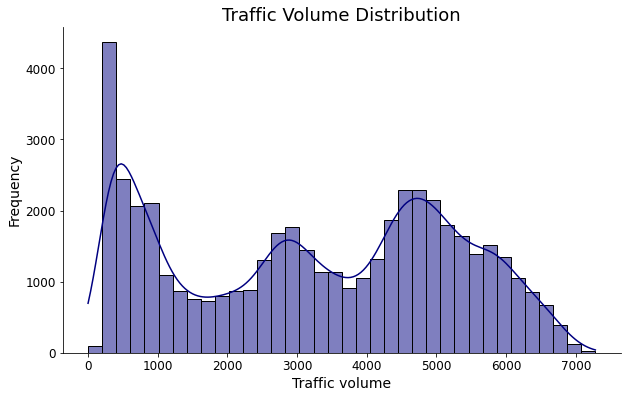

In [10]:
## Pandas method
# traffic['traffic_volume'].plot.hist()

plt.figure(figsize=(10,6))
sns.histplot(data=traffic, x='traffic_volume', color='navy', kde=True)
plt.xlabel('Traffic volume', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Traffic Volume Distribution', fontsize=18)
sns.despine()

- Overall, the distribution is **multimodal**, (having many peaks) at
    - 200-400
    - 2800-3000
    - 4400-4800
- Traffic Volume **ranges from 0 to 7280** cars per hour, with an **average of 3260** cars per hour.
- The **most frequent numbers of car per hour ranges between 200-400** cars per hour.
- Around **25% of the times, less than 1194** cars passed by the station. 
- And for another **25% of the times, more than 4933** cars passed by the station

To find the meanings behind these changing numbers, lets think about some reasons that might be behind the changes. It could be related to the difference between day-time and night-time traffic. It could also be due to any construction activity that might would had taken place. 

Lets try to dig deeper into it with our first hypothesis, i-e, the day-time and night-time difference

Lets choose the `day` and `night` hours arbitrarily.
- We will assume that the day hours are from 07:00 to 19:00
- Night hours shall be from 19:01 to 18:59

In [11]:
bool_day = (traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)
bool_night = ~bool_day

day = traffic.copy()[bool_day]
night = traffic.copy()[bool_night]

In [12]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [13]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

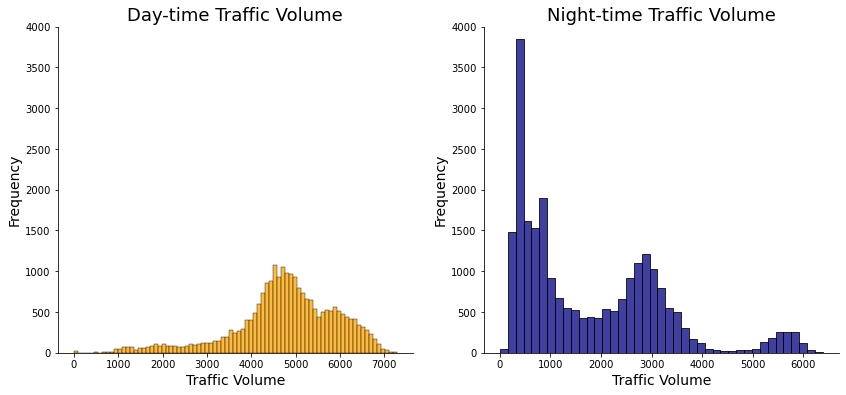

In [14]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(day['traffic_volume'], color='orange')
plt.xlabel('Traffic Volume', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Day-time Traffic Volume', fontsize=18)
plt.ylim(0,4000)

plt.subplot(1, 2, 2)
sns.histplot(night['traffic_volume'], color='navy')
plt.xlabel('Traffic Volume', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Night-time Traffic Volume', fontsize=18)
plt.ylim(0,4000)


sns.despine()

- **Day-Time Traffic:**
    - The distribution is left skewed, i-e there is greater presence of "bigger numbers". This distribution tells us that there is a higher (much higher!) numbers of cars pass by in day time.
    - On average, 4762 cars passed by the station in daytime.
    - 25% of the times, 4252 or less cars were there 
    
- **Night-Time Traffic:**
    - The distribution is right skewed, indicating greater presence of "smaller numbers". This distribution tells us that there is a lower (much lower!) numbers of cars pass by in night time. 
    - On average, 1785 cars passed by the station in daytime.
    - 25% of the times, just 530 or less cars were there 


Since our goal is to identify indicators of **heavy traffic**, we will largely focus at the traffic in day time.

---

So one of the important indicators of heavy traffic is time. 

### Lets see how the traffic volume changed according to the following parameters
- Month
- Day of the week
- Time of day

### Changes over months

In [15]:
# Lets create a new column in daytime DataFrame for months
day['month'] = day['date_time'].dt.month

# Lets group the dataset by the months
by_month = day.groupby('month').mean()


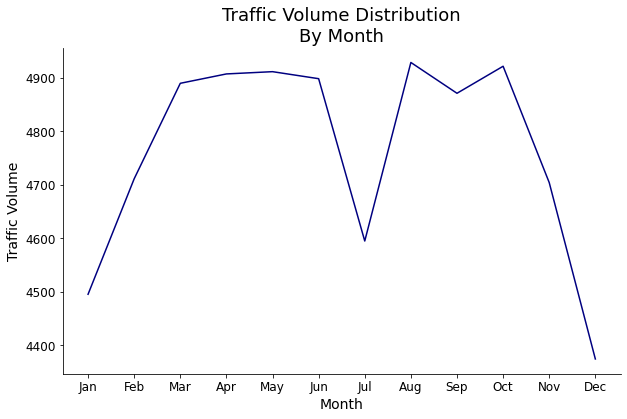

In [16]:
## Pandas Visualization method
#by_month['traffic_volume'].plot.line()

plt.figure(figsize=(10,6))
sns.lineplot(data=by_month, x=by_month.index, y='traffic_volume', color='navy')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Traffic Volume', fontsize=14)
plt.xticks(np.arange(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.yticks(fontsize=12)
plt.title('Traffic Volume Distribution\nBy Month', fontsize=18)
sns.despine()

- Months appear to have an impact on the traffic volume
    - January, July, and December saw the **lowest** traffic volumes.
    - On the other end, at its **maximum** peaks, Traffic Volume was nearly constant from March to June and with a minor dip, it was almost constant from August to October

That **hints towards some vacations** being occured in the months of Jan, July and December.

### Changes over Weekdays

In [17]:
# Lets create a new column in daytime DataFrame for weekday
day['dayofweek'] = day['date_time'].dt.dayofweek

# Lets group the dataset by the months
by_dayofweek = day.groupby('dayofweek').mean()

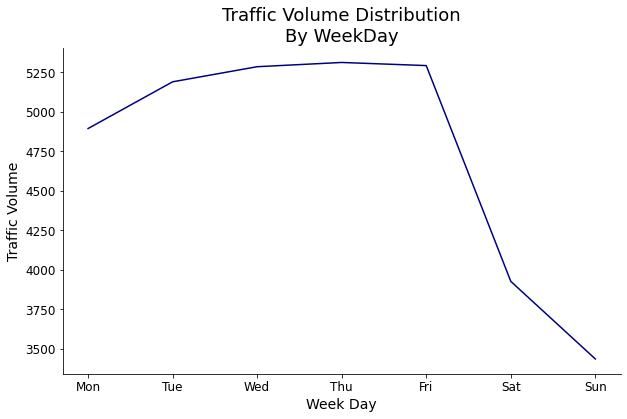

In [18]:
## Pandas Visulaization 
# by_dayofweek['traffic_volume'].plot.line()

plt.figure(figsize=(10,6))
sns.lineplot(data=by_dayofweek, x=by_dayofweek.index, y='traffic_volume', color='navy')
plt.xlabel('Week Day', fontsize=14)
plt.ylabel('Traffic Volume', fontsize=14)
plt.xticks(np.arange(7),['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'],fontsize=12)
plt.yticks(fontsize=12)
plt.title('Traffic Volume Distribution\nBy WeekDay', fontsize=18)
sns.despine()

- With a **very high increase from Sunday, the traffic volume increases steadily from Monday to Friday.** 
- The traffic volume **sharply falls down from Friday and touches the its bottom on Sunday.**

It is very obvious that **the weekends see very low traffic**. Seems like people don't like spending weekends on travelling I-94 

### Changes by hours of the day

In [19]:
day['hour'] = day['date_time'].dt.hour

weekday = day.copy()[day['dayofweek'] <= 4] # With 0: Monday, 1: Tuesday, ... 4: Friday
weekend = day.copy()[day['dayofweek'] > 4] # With 5: Saturday and 6: Sunday


by_hour_weekday = weekday.groupby('hour').mean() # Groupby Weekdays by hour
by_hour_weekend = weekend.groupby('hour').mean() # Groupby Weekends by hour


##### Visualizing the traffic volume by hours on weekdays and weekends

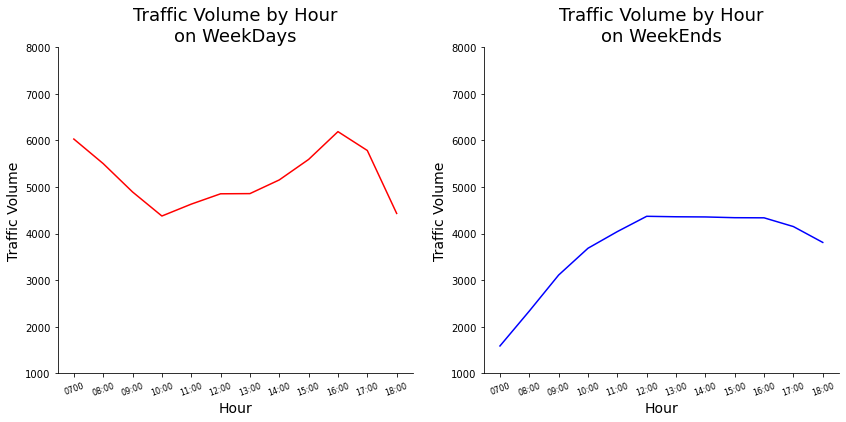

In [20]:
# Weekday Plot
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x=by_hour_weekday.index, y=by_hour_weekday['traffic_volume'], color='red')
plt.xlabel('Hour', fontsize=14)
plt.xticks(np.arange(7,19,1),['0700','08:00','09:00','10:00','11:00',
                              '12:00','13:00','14:00','15:00','16:00',
                              '17:00','18:00'], fontsize=8, rotation=20)
plt.ylabel('Traffic Volume', fontsize=14)
plt.title('Traffic Volume by Hour\non WeekDays', fontsize=18)
plt.ylim(1000,8000)

# Weekend plot
plt.subplot(1, 2, 2)
sns.lineplot(x=by_hour_weekend.index, y=by_hour_weekend['traffic_volume'], color='blue')
plt.xlabel('Hour', fontsize=14)
plt.xticks(np.arange(7,19,1),['0700','08:00','09:00','10:00','11:00',
                              '12:00','13:00','14:00','15:00','16:00',
                              '17:00','18:00'], fontsize=8, rotation=20)
plt.ylabel('Traffic Volume', fontsize=14)
plt.title('Traffic Volume by Hour\non WeekEnds', fontsize=18)
plt.ylim(1000,8000)


sns.despine()

**Observations:**
- As it was seen earlier, the Traffic volume is heavier on weekdays than the weekends
    - **Peak hours** at weekdaysare around 6:00 A.M - 8:00 A.M and 3:30 P.M to 4:30 P.M
    - There are **no such peak hours** on weekends, Traffic volume starts increasing gradually till 12:00 remains nearly constant till the evening. 
    
---

Another possible indicator of heavy traffic is the weather.
### Weather Indicators
We can find information about the weather in the following columns: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`. 

`temp`, `rain_1h`, `snow_1h`, `clouds_all` are numerical, so let's try to figure out how they correlate with `traffic_volume`.

In [21]:
# Correlation with traffic_volume
day.corr()['traffic_volume'][['temp', 'rain_1h', 'snow_1h', 'clouds_all']]

temp          0.128317
rain_1h       0.003697
snow_1h       0.001265
clouds_all   -0.032932
Name: traffic_volume, dtype: float64

- `temp` has the highest correlation with `traffic volume`. Although it is not a strong one

Lets check it out in a scatterplot

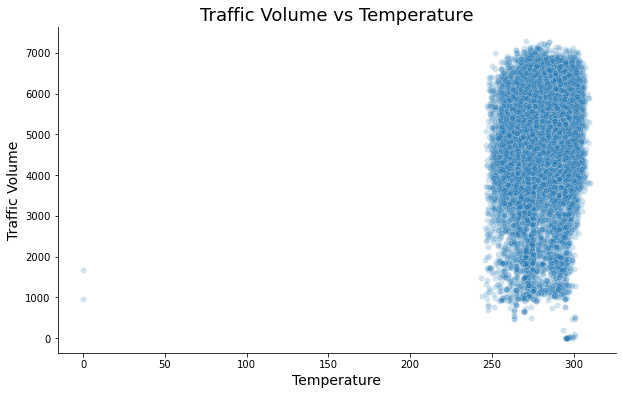

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=day, x='temp', y='traffic_volume', alpha=0.2)
plt.xlabel('Temperature', fontsize=14)
plt.ylabel('Traffic Volume', fontsize=14)
plt.title('Traffic Volume vs Temperature', fontsize=18)
sns.despine()

- There are **no impressive correlations** between numerical columns associated with weather and the traffic volume
- Temperature doesn't look to have a decisive correlation with Traffic Volume either, with a insignificant correlation of 0.128

Its better that we do not disregard the numerical columns of weather altogether and look into the Categorical ones like `weather_main`, `weather_description`. 

In [23]:
# Group the main types of the weather by mean
by_weather_main = day.groupby('weather_main').mean().sort_values(by='traffic_volume')

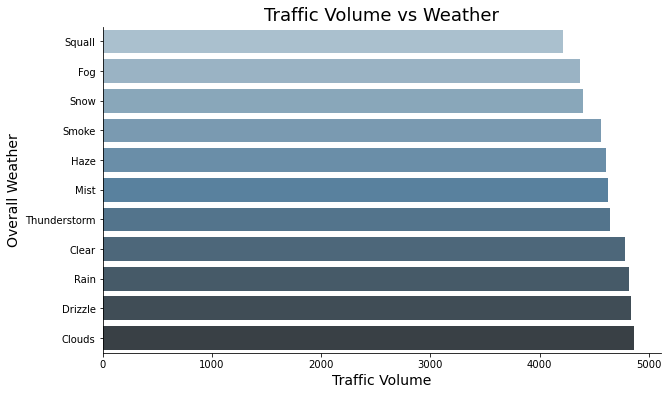

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(data=by_weather_main.sort_values(by='traffic_volume'), 
            x='traffic_volume', y=by_weather_main.index,palette='Blues_d',saturation=0.5)
plt.xlabel('Traffic Volume', fontsize=14)
plt.ylabel('Overall Weather', fontsize=14)
plt.title('Traffic Volume vs Weather', fontsize=18)
sns.despine()

- The traffic volume doesn't appears to be impacted by the weather. We could not find any heavy traffic indicator here as none of the categories in `weather_main` could garner the exceptional traffic volume 

Let's group by `weather_description` also and see if there are some indicators

In [25]:
# Group by the weather_descriptions by mean
by_weather_description = day.groupby('weather_description').mean().sort_values(by='traffic_volume')

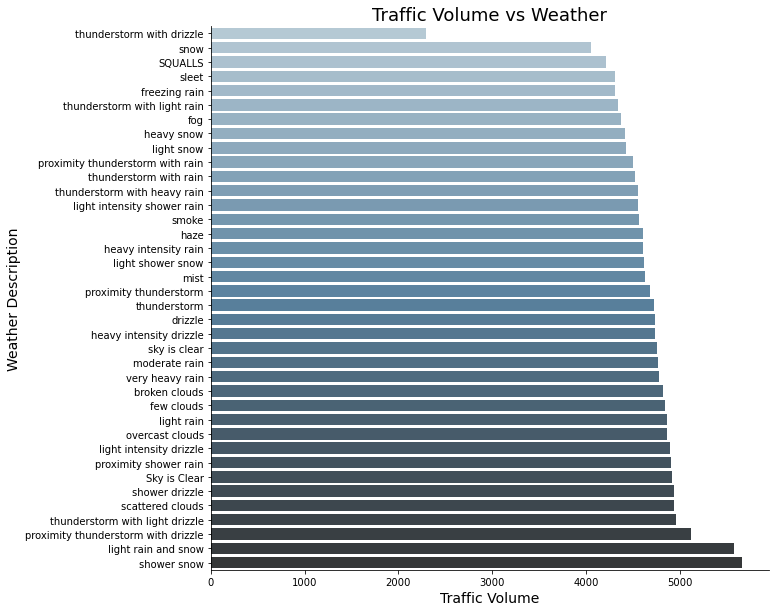

In [26]:
plt.figure(figsize=(10,10))
sns.barplot(data=by_weather_description, x='traffic_volume', 
            y=by_weather_description.index,palette='Blues_d',saturation=0.5)
plt.xlabel('Traffic Volume', fontsize=14)
plt.ylabel('Weather Description', fontsize=14)
plt.title('Traffic Volume vs Weather', fontsize=18)
sns.despine()


- We can see that there are three main weather types where traffic volume managed to exceed 5,000:
    - Shower snow
    - Light rain and snow
    - Proximity thunderstorm with drizzle
    
Now this could have many reasons and among them is that in either of the weathers, the driving speed is slowed down. This factor could contribute in an 'increased' traffic volume

---
## Conclusion

The best time based indicators of heavey traffic are:
 - Day of the week: traffic is considerably heavier during weekdays in comparison to the weekend.
 - Time of day: During business days traffic will be heavier at rush hours 06:00-08:00 and 03:30-04:30.
 - Month of the year: Traffic will be heavier from March to June and from August to October (with a dip in july) and quieter during the remaining months.

Thought quite weak, there are 3 weather types which can be associated with heavier traffic:
- light rain and snow
- shower snow
- proximity thunderstorm with drizzle

The type of weather appears to be a fairly poor indicator of heavy traffic as nearly all types are associated with volumes exceeding 4000 cars. Therefore the time based indicators especially the day and time of day metrics are the most useful inducators of heavy traffic.
